In [105]:
#importar los modulos necesarios 
from sklearn.cluster import KMeans
import numpy as np
import cv2
from matplotlib import pyplot as plt

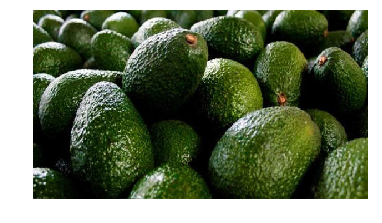

In [153]:
#leer una imagen en formato jpg
img = cv2.imread("paltas.jpg")
#conversion de escala BGR a RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#crear figura
plt.figure()
plt.axis("off")
#mostrar la imagen
plt.imshow(img)

In [155]:
#--------PARAMETRO QUE DEFINE LA CANTIDAD DE CLUSTER A ENCONTRAR
K=3
#=====================

In [156]:
#cambiar las dimensiones de la matriz RGB (Nf,Nc,Capas) a filas,columnas
imgrgb = img.reshape((img.shape[0] * img.shape[1], 3))
#crear objeto para realizar la clasificación no supervisada 
cluster = KMeans(n_clusters=K,verbose=0)
#relizar el ajuste sobre la matriz de dimensiones [img.shape[0]*img.shape[1],3]
cluster.fit(imgrgb)

print("======FIN K-MEANS====")

======FIN K-MEANS====


Determinar el histograma asociado a cada cluster
y convertirlo a flotante cuya suma sea igual a 1

In [157]:
 
#determinar el vector que identifica a la cantidad de clusters K + 1 ,0 1 2 K
cluster_vector = np.arange(0, len(np.unique(cluster.labels_)) + 1)
#obtener las etiquetas de cada muestra 
muestras=cluster.labels_ 
#calcular el histograma de cada muestra 
(hist, _) = np.histogram(cluster.labels_, bins = cluster_vector)
#cambiar al tipo de dato flotante
hist = hist.astype("float")
#normalizar el histograma , la suma que sea igual a 1
hist = hist/ hist.sum()

Determinar los centroides de cada cluster y realizar graficos de rectangulos uno por cada cluster donde 
haya la mayor concentración de color presente en la imagen

In [168]:
#determinar los centroides de cada cluster 
centroides=cluster.cluster_centers_
#mostrar los centroides encontrados
print(centroides)
#Los centroides determinar los colores mas representaivos
#------------Esta seccion solo es para mostrar en regiones rectangulares los colores mas representativos 
#que se han encontrado en la imagen meadinte el algoritmo K MEANS
ancho=499
largo=100
#-------crear imagen de solo ceros ----------
barras = np.zeros((largo, ancho, 3), dtype = "uint8")
initx = 0
#para cada centroide que representa el color mas representativo
for (proba, color) in zip(hist, centroides):
	# mostrar el porcentage de color en un grafico
	finalx = initx + (proba * ancho)
	cv2.rectangle(barras, (int(initx), 0), (int(finalx), largo),color.astype("uint8").tolist(),-1)
	initx = finalx


[[ 83.51554435 103.06577018  47.21568512]
 [179.43371258 190.46301089 174.23121246]
 [ 18.13637104  31.52930439   6.66937758]]


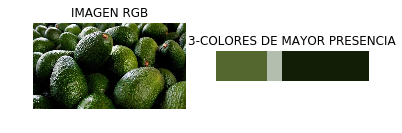

In [169]:
#mostrar graficos de la imagen y barras de concentracion de color
plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img)
plt.title('IMAGEN RGB')

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(barras)
plt.title('{}-COLORES DE MAYOR PRESENCIA'.format(K))

plt.show()
